# Importing required libraries:
---

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Notes:

- Some of rows in the dataset will be eliminted if they are empty.
- If the analysis process need to work on the "Age" column, all passengers who have unknown age won't be included in the analysis and so on.

# Data wrangling:
---

#### VARIABLE DESCRIPTIONS:

column | description
------ | -----
PassengerId | Passanger number in  the dataset
survival |Survival (0 = No; 1 = Yes)
pclass | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name  | Name
sex  |  Sex
age  | Age
sibsp | Number of Siblings/Spouses
parch | Number of Parents/Children
ticket | Ticket Number
fare | Passenger Fare
cabin | Cabin
embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southhampton)



In [534]:
allData = pd.read_csv("titanic-data.csv")
TitanicPassengersData = allData

#### Make things readable and clean:
---

In [535]:
def toFullPortName(port):
    if port == "C":
        return "Cherbourg"
    elif port == "Q":
        return "Queenstown"
    elif port == "S":
        return "Southhampton"
    else:
        return port 
    
def isSurvived(status):
    if status == 0:
        return "No"
    elif status == 1:
        return "Yes"
    else:
        return status

def toClassName(classId):
    if classId == 1:
        return "1st"
    elif classId == 2:
        return "2nd"
    elif classId == 3:
        return "3rd"
    else:
        return classId
    
TitanicPassengersData["Embarked"] = TitanicPassengersData["Embarked"].apply(toFullPortName)
TitanicPassengersData["Survived"] = TitanicPassengersData["Survived"].apply(isSurvived)
TitanicPassengersData["Pclass"] = TitanicPassengersData["Pclass"].apply(toClassName)

### Data after cleaning up:
---

In [536]:
TitanicPassengersData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton


### Groups based on survive state:

In [537]:
survivedPeople = TitanicPassengersData[TitanicPassengersData["Survived"] == "Yes"]
deadPeople = TitanicPassengersData[TitanicPassengersData["Survived"] == "No"]



# Analysis Questions:
---

Q1: What is the average age for people who did and didn't survive?

Q2: What is the rate of surviving to each passenger class?

Q3: Which age range has the most number of passengers who did and didn't survive? (Range of 5 Years)

Q4: What is the mean of ticket fare to each passenger class?

Q5: What is the sex ratio (ratio of males to females)?

Q6: What is the survivation ratio ?

Q7: What is the relationship between the starting port (Embarked) and tickets fare

---

# Q1: What is the average age for people who did and didn't survive?


###### First let's see the distribution of passengers age:

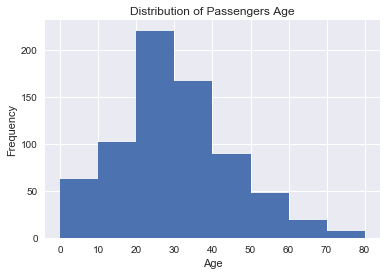

In [538]:
TitanicPassengersData["Age"].plot.hist(title="Distribution of Passengers Age", bins=range(0, 85, 10)).set_xlabel("Age")
plt.show()

- We can see that most passengers are between 20 and 40 years old which follows a normal distribution.

In [539]:

meanOfSurvived = survivedPeople["Age"].mean()
meanOfDead = deadPeople["Age"].mean()
meanAgeOfALL = TitanicPassengersData["Age"].mean()

pd.DataFrame({"Mean age of all passengers": {"Years": meanAgeOfALL},"Mean age of dead passengers": {"Years": meanOfDead},"Mean age of survived passengers": {"Years": meanOfSurvived}})

,Mean age of all passengers,Mean age of dead passengers,Mean age of survived passengers
Years,29.699118,30.626179,28.34369


- From the previews we can see that the survived passengers age has mean of 28.3 years which is 2 years younger than dead passengers


---

# Q2: What is the rate of surviving to each passenger class?

In [540]:
def splitBy(pClass):
    passengers = TitanicPassengersData[TitanicPassengersData["Pclass"] == pClass]
    return passengers[passengers["Survived"] == "Yes"]

firstClass = splitByClass("1st")

secondClass = splitByClass("2nd")

thirdClass = splitByClass("3rd")

In [541]:
survivedPeopleCount = survivedPeople["PassengerId"].count()
firstClassCount = firstClass["PassengerId"].count()
secondClassCount = secondClass["PassengerId"].count()
thirdClassCount = thirdClass["PassengerId"].count()

rateOfFirstClass = firstClassCount / survivedPeopleCount * 100 
rateOfsecondClass = secondClassCount / survivedPeopleCount * 100 
rateOfthirdClass = thirdClassCount / survivedPeopleCount * 100 

rateValues = [rateOfFirstClass,rateOfsecondClass,rateOfthirdClass]


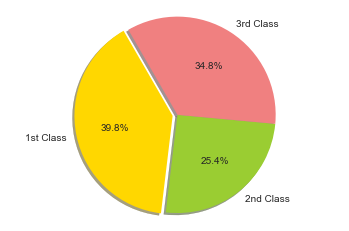

In [542]:
plt.pie(rateValues, explode=(0.05,0,0) ,labels=["1st Class","2nd Class","3rd Class"], autopct='%1.1f%%',
        shadow=True, startangle=120,colors = ['gold', 'yellowgreen', 'lightcoral'])
plt.axis('equal')
plt.show()

- We can see from this visualization that the most people who survived were 1st class passengers then 3rd class and last the 2nd class. 

---

# Q3: Which age range has the most number of passengers who did and didn't survive? (Range of 5 Years)

##### For the passengers who survived:

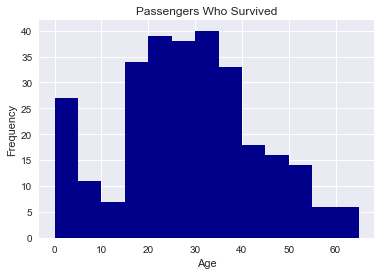

In [543]:
survivedPeople["Age"].plot(kind="hist", color="darkblue", bins=range(0,70,5), figsize=(6, 4),
                          title="Passengers Who Survived").set_xlabel("Age")
plt.show()

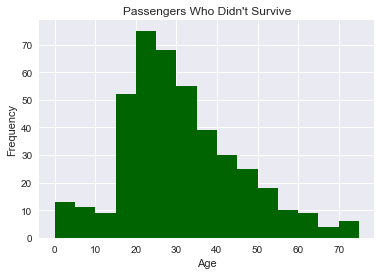

In [544]:
deadPeople["Age"].plot(kind="hist", color="darkgreen", bins=range(0,80,5), figsize=(6, 4),
                          title="Passengers Who Didn't Survive").set_xlabel("Age")
plt.show()

###### We can say now the following:
- Most of passengers who survived are in range of 30-35 years old.

- Most of passengers who didn't survive are in range of 20-25 years old.

---

# Q4: What is the mean of ticket fare to each passenger class?

In [545]:

def splitFaresByClass(pClass):
    return TitanicPassengersData[TitanicPassengersData["Pclass"] == pClass]

firstClass_fares = splitFaresByClass("1st")["Fare"]
secoundClass_fares = splitFaresByClass("2nd")["Fare"]
thirdClass_fares = splitFaresByClass("3rd")["Fare"]
mean1st = firstClass_fares.mean()
mean2nd = secoundClass_fares.mean()
mean3rd = thirdClass_fares.mean()

pd.DataFrame({"Mean of 1st class fares": {"$": mean1st},"Mean of 2nd class fares": {"$": mean2nd},"Mean of 3rd class fares": {"$": mean3rd}})



,Mean of 1st class fares,Mean of 2nd class fares,Mean of 3rd class fares
$,84.154687,20.662183,13.67555


---

# Q5: What is the sex ratio (ratio of males to females)?

###### Let's see how many passengers aboard titanic (based on sex)

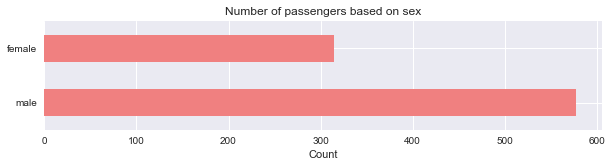

In [546]:
countBySex = TitanicPassengersData["Sex"].value_counts()
countBySex.plot(kind="barh", figsize=(10, 2),title="Number of passengers based on sex", color="lightcoral").set_xlabel("Count")
plt.show()

###### We can see next the sex raito of titanic passengers.

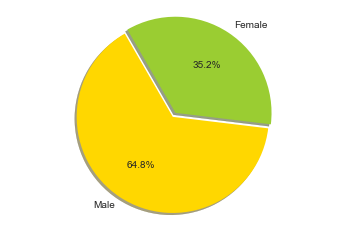

In [547]:
allPassengers = countBySex["male"] + countBySex["female"]

maleRaito = countBySex["male"] / allPassengers * 100
femaleRaito = countBySex["female"] / allPassengers * 100

plt.pie([maleRaito,femaleRaito], explode=(0.05,0) ,labels=["Male","Female"], autopct='%1.1f%%',
        shadow=True, startangle=120,colors = ['gold', 'yellowgreen', 'lightcoral'])
plt.axis('equal')
plt.show()

---

# Q6: What is the survivation ratio ?

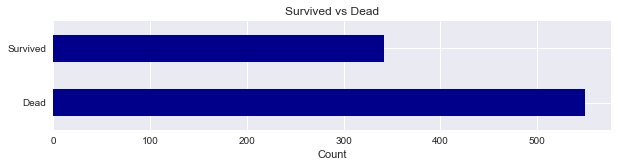

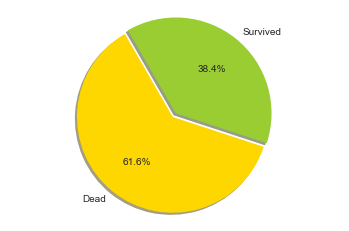

In [548]:
def survivalState(col):
    if col == "No":
        return "Dead"
    elif col == "Yes":
        return "Survived"

num_survived = TitanicPassengersData["Survived"].apply(survivalState).value_counts()
num_survived.plot(kind="barh", figsize=(10, 2), color="darkblue", title="Survived vs Dead").set_xlabel("Count")
plt.show()

allPassengersState = num_survived["Dead"] + num_survived["Survived"]

deadRaito = num_survived["Dead"] / allPassengersState * 100
survRatio = num_survived["Survived"] / allPassengersState * 100


plt.pie([deadRaito,survRatio], explode=(0.05,0) ,labels=["Dead","Survived"], autopct='%1.1f%%',
        shadow=True, startangle=120,colors = ['gold', 'yellowgreen'])
plt.axis('equal')
plt.show()

---

# Q7: What is the relationship between the starting port (Embarked) and tickets fare?

###### Let's calculate the mean of fares for each port's passengers:

In [549]:
def splitFaresByPort(port):
    return TitanicPassengersData[TitanicPassengersData["Embarked"] == port]

cherbourgPort = splitFaresByPort("Cherbourg")
queenstownPort = splitFaresByPort("Queenstown")
southamptonPort = splitFaresByPort("Southhampton")

cherbourgPortFaresMean = cherbourgPort["Fare"].mean()
queenstownPortFareMean = queenstownPort["Fare"].mean()
southamptonPortFareMean = southamptonPort["Fare"].mean()

pd.DataFrame({"Cherbourg port": {"Mean $": cherbourgPortFaresMean,"Count": len(cherbourgPort)} ,"Queenstown port": {"Mean $": queenstownPortFareMean,"Count": len(queenstownPort)},"Southhampton port": {"Mean $": southamptonPortFareMean,"Count": len(southamptonPort)}})


,Cherbourg port,Queenstown port,Southhampton port
Count,168.000000,77.00000,644.000000
Mean $,59.954144,13.27603,27.079812


- From this we can see that Cherbourg port has highest mean of fares but most of passengers from Southhampton port.

---

# Conclusions:

At the end we can see from a survival perspective it seems that if you are 20-35 years old you will have high chance to survive plus if you are 1st class passenger this will increase the chance more.

Some of data like "Cabin" is not helpfull unless we do understand what they are like using a map of Titanic so we can do more stuff about it.

From analysis perspective, we can't say for sure that this sample of data is 100% correct and was chosen using the right way.


---

# Resources:

###### Websites:

- https://stackoverflow.com
- https://github.com
- https://docs.python.org/3/
- https://www.udacity.com